### BA Assignment 3: 

## Problem 1: CitiBike anomaly detection & neighborhood usage
> *CitiBike data reveals how users go about using bikes for travel needs such as commuting,
entertainment, and tourism. However, the data is highly criticized for anomalies.*

### Questions: Explore this CitiBike dataset and answer the following questions:
1. What anomalies detectable with tripduration and the age of the user
2. Which neighborhoods have the highest demand in traffic usage. Conduct your exploratory data analysis using the relative number of departures by riders with annual memberships from Citi Bike stations that happen during
 - Morning

 - Evening

 - Alternative hours

3. Based on your anomalies analysis in (1) and geographical usage in (2), what recommendation would you provide to the CitiBike operators


**Q1 What anomalies detectable with tripduration and the age of the user**

**Solution:**

In [14]:
#data importing 
library(ggplot2)
Main.df = read.csv("C:\\Users\\shrey\\OneDrive\\Desktop\\BUSINESS ANALYTICS\\Datasets\\Data 3.1.csv")

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [15]:
#data understanding
class(Main.df)
head(Main.df,3)
tail(Main.df,3)

[1] "data.frame"

ï..tripduration,starttime,stoptime,start.station.id,start.station.name,start.station.latitude,start.station.longitude,end.station.id,end.station.name,end.station.latitude,end.station.longitude,bikeid,usertype,birth.year,gender
364,9/1/2017 0:02,9/1/2017 0:08,3183,Exchange Place,40.71625,-74.03346,3276,Marin Light Rail,40.71458,-74.04282,29670,Subscriber,1989,1
357,9/1/2017 0:08,9/1/2017 0:14,3187,Warren St,40.72112,-74.03805,3199,Newport Pkwy,40.72874,-74.03211,26163,Subscriber,1980,1
432,9/1/2017 0:10,9/1/2017 0:17,3195,Sip Ave,40.73074,-74.06378,3280,Astor Place,40.71928,-74.07126,26273,Subscriber,1988,1


,ï..tripduration,starttime,stoptime,start.station.id,start.station.name,start.station.latitude,start.station.longitude,end.station.id,end.station.name,end.station.latitude,end.station.longitude,bikeid,usertype,birth.year,gender
29060,1313,9/27/2017 9:53,9/27/2017 10:15,3188,NJCU,40.71011,-74.08585,3274,Bethune Center,40.70496,-74.08593,26181,Subscriber,1975,2
29061,265,9/27/2017 9:53,9/27/2017 9:58,3203,Hamilton Park,40.72760,-74.04425,3186,Grove St PATH,40.71959,-74.04312,26242,Subscriber,1984,1
29062,202,9/27/2017 9:54,9/27/2017 9:58,3272,Jersey & 3rd,40.72333,-74.04595,3203,Hamilton Park,40.72760,-74.04425,26282,Subscriber,1975,1


In [16]:
str(Main.df)

'data.frame':	29062 obs. of  15 variables:
 $ ï..tripduration        : int  364 357 432 934 932 414 625 178 557 220 ...
 $ starttime              : Factor w/ 16169 levels "9/1/2017 0:02",..: 1 2 3 3 3 4 4 5 6 7 ...
 $ stoptime               : Factor w/ 16250 levels "9/1/2017 0:08",..: 1 2 3 5 5 4 5 6 8 7 ...
 $ start.station.id       : int  3183 3187 3195 3272 3272 3186 3194 3183 3183 3187 ...
 $ start.station.name     : Factor w/ 49 levels "5 Corners Library",..: 17 47 44 24 24 19 32 17 17 47 ...
 $ start.station.latitude : num  40.7 40.7 40.7 40.7 40.7 ...
 $ start.station.longitude: num  -74 -74 -74.1 -74 -74 ...
 $ end.station.id         : int  3276 3199 3280 3207 3207 3480 3194 3214 3199 3270 ...
 $ end.station.name       : Factor w/ 68 levels "12 Ave & W 40 St",..: 40 49 4 51 51 67 41 20 49 32 ...
 $ end.station.latitude   : num  40.7 40.7 40.7 40.7 40.7 ...
 $ end.station.longitude  : num  -74 -74 -74.1 -74.1 -74.1 ...
 $ bikeid                 : int  29670 26163 26273 26297 292

### Observation:
<div class="alert alert-block alert-warning">
<b>Changes needed:
</b> 

- Date and time are factors which should be changed.
    
- Lat and long are num which should be facors instead.

- Station ID, Bike ID, gender should be factor too 
</div>


In [17]:
# Date transformation
Main.df$start.station.id = as.factor(Main.df$start.station.id)
Main.df$start.station.longitude = as.factor(Main.df$start.station.longitude)
Main.df$start.station.latitude = as.factor(Main.df$start.station.latitude)
Main.df$end.station.id = as.factor(Main.df$end.station.id)
Main.df$end.station.latitude = as.factor(Main.df$end.station.latitude)
Main.df$end.station.longitude = as.factor(Main.df$end.station.longitude)
Main.df$bikeid = as.factor(Main.df$bikeid)
Main.df$gender = as.factor(Main.df$gender)

# Converting Date format type to Date type
Main.df$starttime= as.POSIXct(Main.df$starttime,format="%m/%d/%Y %H:%M",tz=Sys.timezone())
Main.df$stoptime= as.POSIXct(Main.df$stoptime,format="%m/%d/%Y %H:%M",tz=Sys.timezone())

# changing colname of tripduration
colnames(Main.df)[colnames(Main.df)=="ï..tripduration"] <- "Tripduration"

#changing tripduration from seconds to minutes

Main.df$Tripduration = Main.df$Tripduration/60


In [18]:
#creating new column for age
Main.df$age = 2019 - as.numeric(as.character(Main.df[,"birth.year"])) 

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"

####  The format looks much better.

### Analysis of time duration with respect to Age:

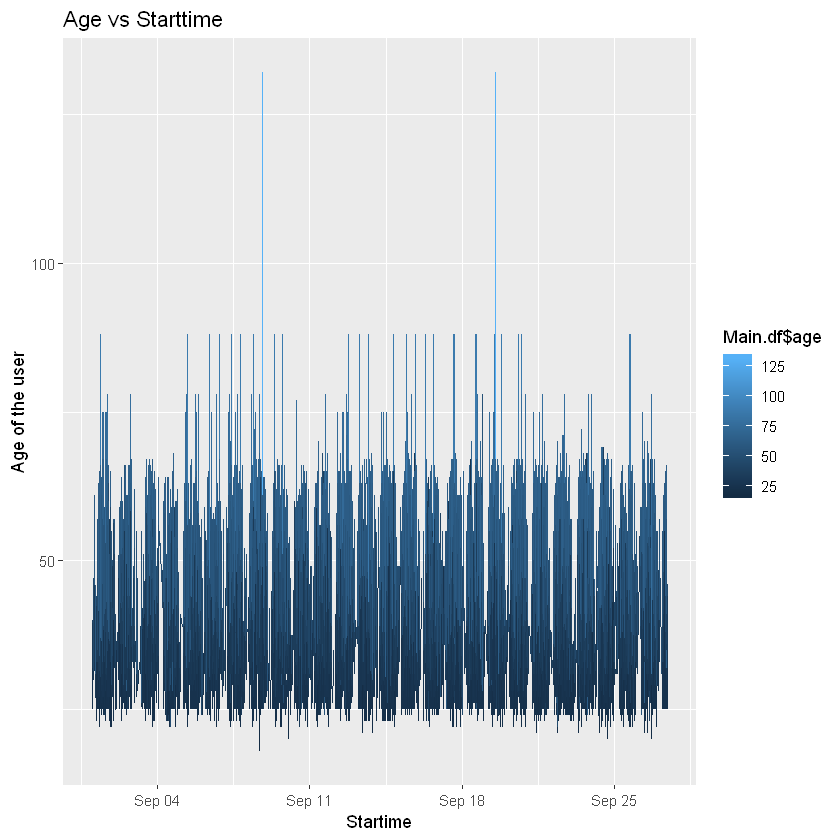

In [19]:

ggplot(Main.df, aes(x=Main.df$starttime, y=Main.df$age, color = Main.df$age)) + 
    geom_line() + 
    ggtitle("Age vs Starttime")+
    xlab("Startime")+
    ylab("Age of the user")

### We can see some instances of age going beyond 100 years

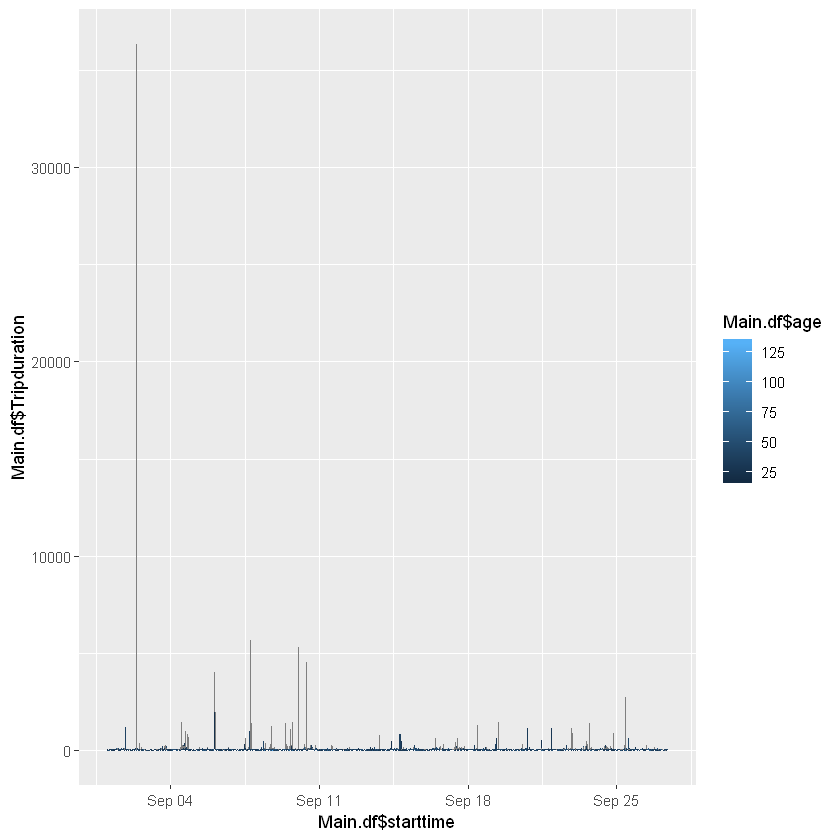

In [20]:
ggplot(Main.df, aes(x=Main.df$starttime, y=Main.df$Tripduration, color=Main.df$age)) + geom_line()

### Above we see an instance of data going beyond 35000 mins.

In [21]:
print("Summary of Tripduration")
summary(Main.df$Tripduration)

print("Summary of Age")
summary(Main.df$age)

[1] "Summary of Tripduration"


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    1.02     3.97     5.93    12.98    10.20 36360.47 

[1] "Summary of Age"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  18.00   32.00   36.00   38.84   44.00  132.00    2157 

### Strange anomalies:
- Max Tripduration is 36360.47 mins which is a little more than 25 days.That sure is unusual 
- It is unusal to have citibike user with age 132 years too.

In [22]:
Main.df[Main.df$Tripduration > 36000|Main.df$Tripduration == min(Main.df$Tripduration),]

,Tripduration,starttime,stoptime,start.station.id,start.station.name,start.station.latitude,start.station.longitude,end.station.id,end.station.name,end.station.latitude,end.station.longitude,bikeid,usertype,birth.year,gender,age
1188,36360.466667,2017-09-02 08:44:00,2017-09-27 14:44:00,3202,Newport PATH,40.7272235,-74.0337589,3217,Bayside Park,40.69865054,-74.08207968,29542,Customer,NULL,0,NA
4045,1.016667,2017-09-05 18:09:00,2017-09-05 18:10:00,3185,City Hall,40.7177325,-74.043845,3186,Grove St PATH,40.71958612,-74.04311746,29642,Subscriber,1957,1,62
10233,1.016667,2017-09-11 09:51:00,2017-09-11 09:52:00,3267,Morris Canal,40.71241882,-74.03852552,3214,Essex Light Rail,40.7127742,-74.0364857,29290,Subscriber,1988,1,31
11884,1.016667,2017-09-12 17:05:00,2017-09-12 17:06:00,3184,Paulus Hook,40.7141454,-74.0335519,3183,Exchange Place,40.7162469,-74.0334588,29203,Subscriber,1989,1,30
16845,1.016667,2017-09-16 15:12:00,2017-09-16 15:13:00,3220,5 Corners Library,40.73496102,-74.05950308,3220,5 Corners Library,40.73496102,-74.05950308,29247,Subscriber,1985,1,34
19787,1.016667,2017-09-19 08:19:00,2017-09-19 08:20:00,3272,Jersey & 3rd,40.72333159,-74.04595256,3211,Newark Ave,40.72152515,-74.04630454,29279,Subscriber,1988,1,31
23177,1.016667,2017-09-21 20:12:00,2017-09-21 20:13:00,3211,Newark Ave,40.72152515,-74.04630454,3272,Jersey & 3rd,40.72333159,-74.04595256,26302,Subscriber,1972,1,47
23974,1.016667,2017-09-22 14:02:00,2017-09-22 14:03:00,3202,Newport PATH,40.7272235,-74.0337589,3202,Newport PATH,40.7272235,-74.0337589,29575,Subscriber,1992,1,27


1) Even more strange since the distance between start and end stop is just 4.7 miles and the bikeride with 25 days of tripduration.

2) It is also odd to see some of the shortest Trip duration with Start and End station being much far away than the time it shows it covered in.

Warning message:
"Removed 2157 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 2157 rows containing missing values (geom_point)."

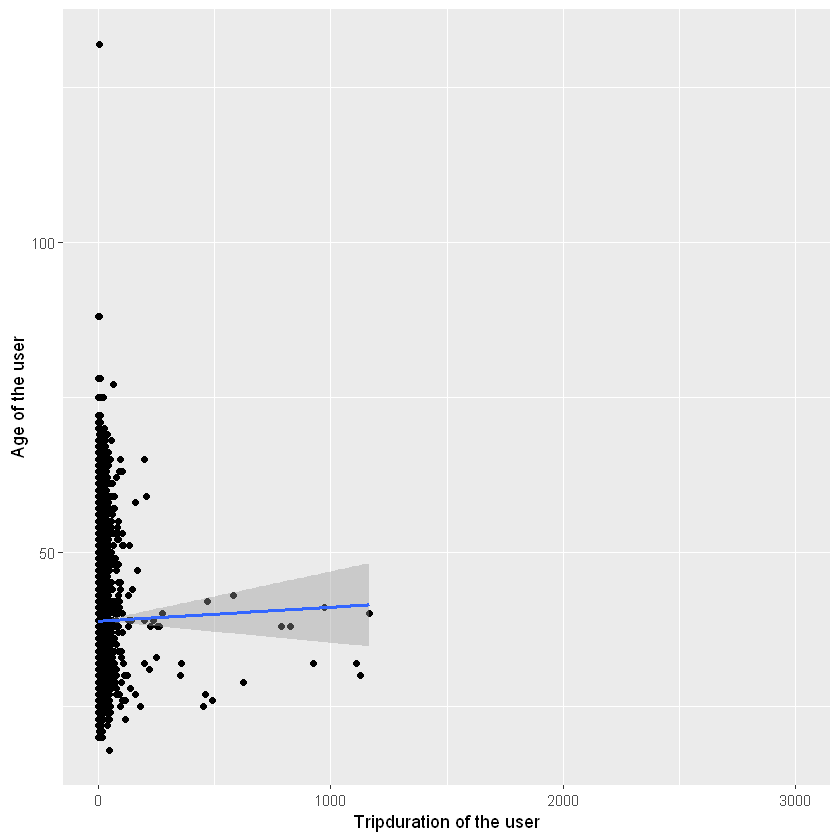

In [26]:
ggplot(data = Main.df, aes(x=Main.df$Tripduration, y= Main.df$age)) + 
    geom_point() +
    xlim(0,3000) +
    ylab("Age of the user") +
    xlab("Tripduration of the user")+
    geom_smooth(method='lm',formula=y~x)

**We can see just a handful of users lying in extreme ends of both the axis**

### 2. Which neighborhoods have the highest demand in traffic usage. Conduct your exploratory data analysis using the relative number of departures by riders with annual memberships from Citi Bike stations that happen during
 - Morning

 - Evening

 - Alternative hours
 
 **Solution:**

In [27]:
install.packages("chron")
library(chron)


Warning message:
"package 'chron' is in use and will not be installed"

In [28]:
#Taking data with Annual membership.
Main.df = Main.df[Main.df$usertype == "Subscriber",]
#breaking time from the datetime
Main.df$Time <- chron(times=strftime(Main.df$starttime, format="%H:%M:%S"))

In [33]:
cat("Time class is :",class(Main.df$Time))

Time class is : times

In [34]:
#running through time column to give duration of the day
for (a in 1:nrow(Main.df))
{
    if(Main.df$Time[a] > "06:00:00" & Main.df$Time[a] <= "12:00:00"){
        Main.df$during[a] = "Morning"
    }else if(Main.df$Time[a] > "12:00:00" & Main.df$Time[a] <="16:00:00"){
        Main.df$during[a] ="Lunch"
    }else if(Main.df$Time[a] > "16:00:00" & Main.df$Time[a] <="23:59:00"){
        Main.df$during[a] ="Evening"
    }else if(Main.df$Time[a] > "23:59:00" & Main.df$Time[a] <="06:00:00")
    {
        Main.df$during[a] = "Night"
    }
}

Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

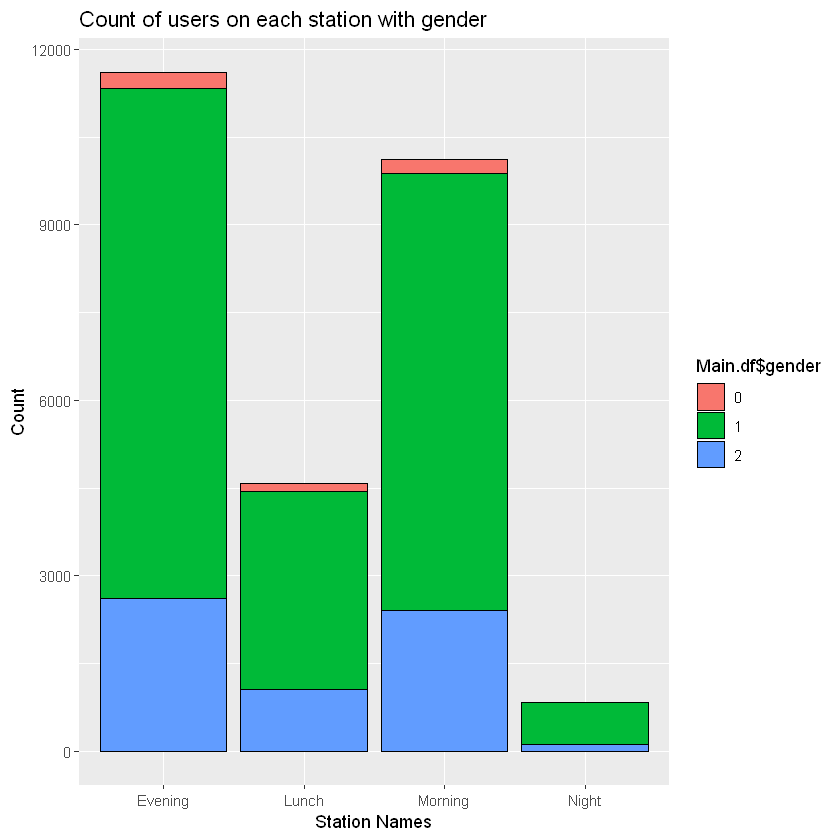

In [35]:
ggplot(data = Main.df, aes(x = Main.df$during, fill = Main.df$gender)) + 
    geom_histogram(stat = "count",color="black") + 
    ggtitle("Count of users on each station with gender")+
    ylab("Count")+
    xlab("Station Names")

- **The above histogram shows that Evenings and Mornings are the most crowded time of the day.**
- **Also, gender 1 is our top most user throughout the day.**

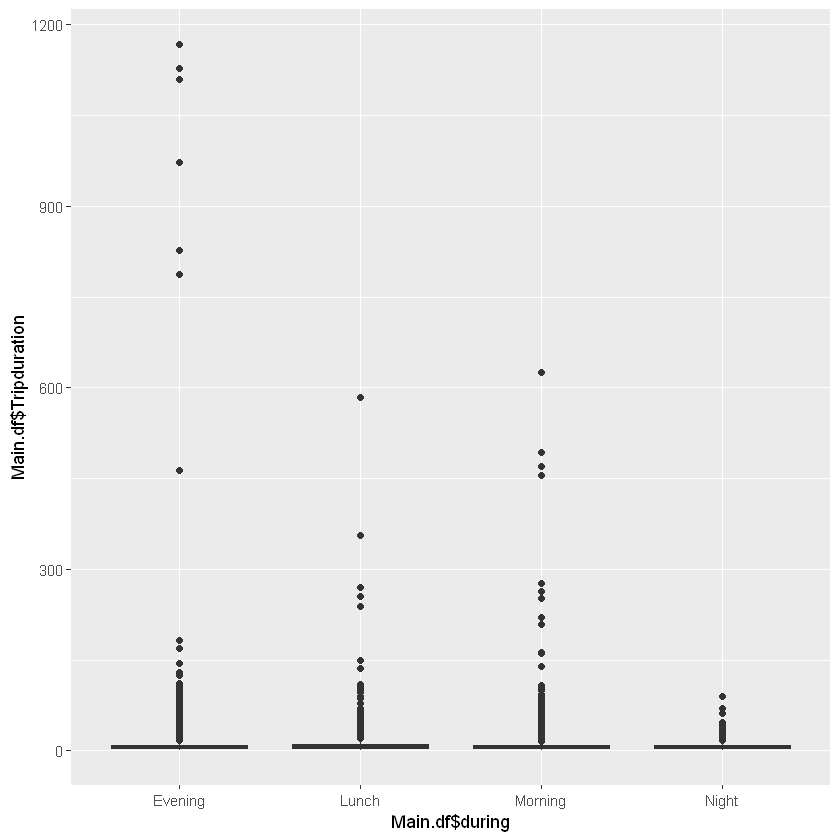

In [37]:
ggplot(data = Main.df, aes(x = Main.df$during, y = Main.df$Tripduration)) + geom_boxplot()

- ### Evening has the most outliers in tripduration as we can see from the above plot.

In [38]:

library(magrittr) # needs to be run every time you start R and want to use %>%
library(dplyr)    # alternatively, this also loads %>%


#grouping by the start station to get the number of usage from that place 
df = Main.df %>% group_by(start.station.name,during) %>% 
summarise(n = n(),trip = sum(Tripduration)) %>% 
filter(n > 1)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

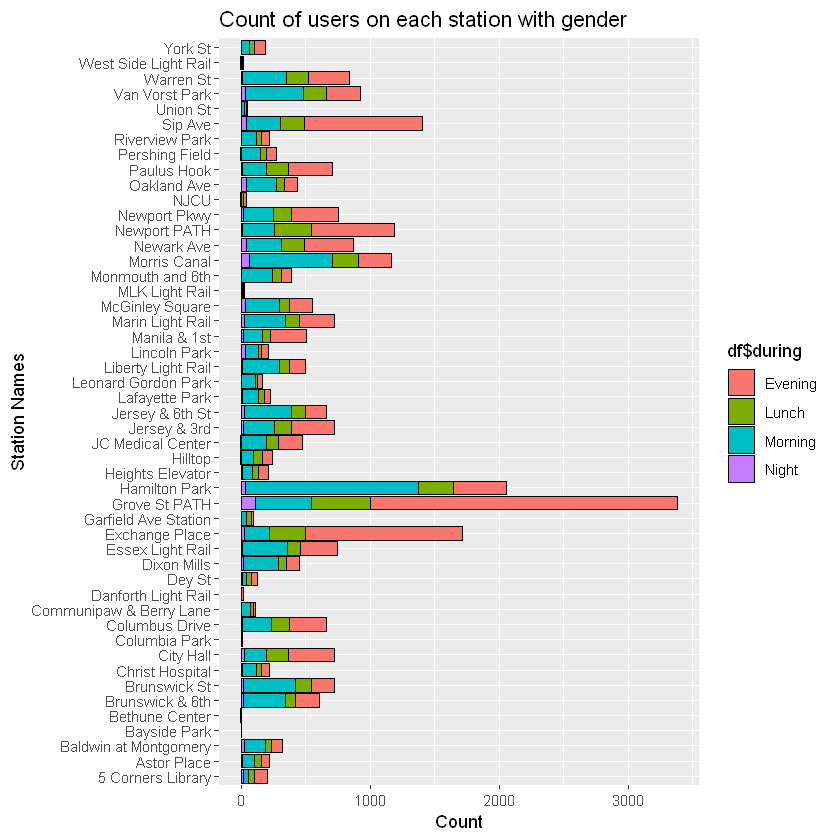

In [42]:
ggplot(data = df, aes(x = df$start.station.name, y = df$n, fill = df$during)) + 
    geom_histogram(stat= "identity", color="Black") + 
    coord_flip()+
    ggtitle("Count of users on each station with gender")+
    ylab("Count")+
    xlab("Station Names")

### Insights:
- **Grove St PATH** has the most traffic. Also it has the **highest Evening traffic** compared to all the other stations.
- **Hamilton Park** has the second highest traffic. Also, the **highest Morning traffic** compared to other stations.

Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

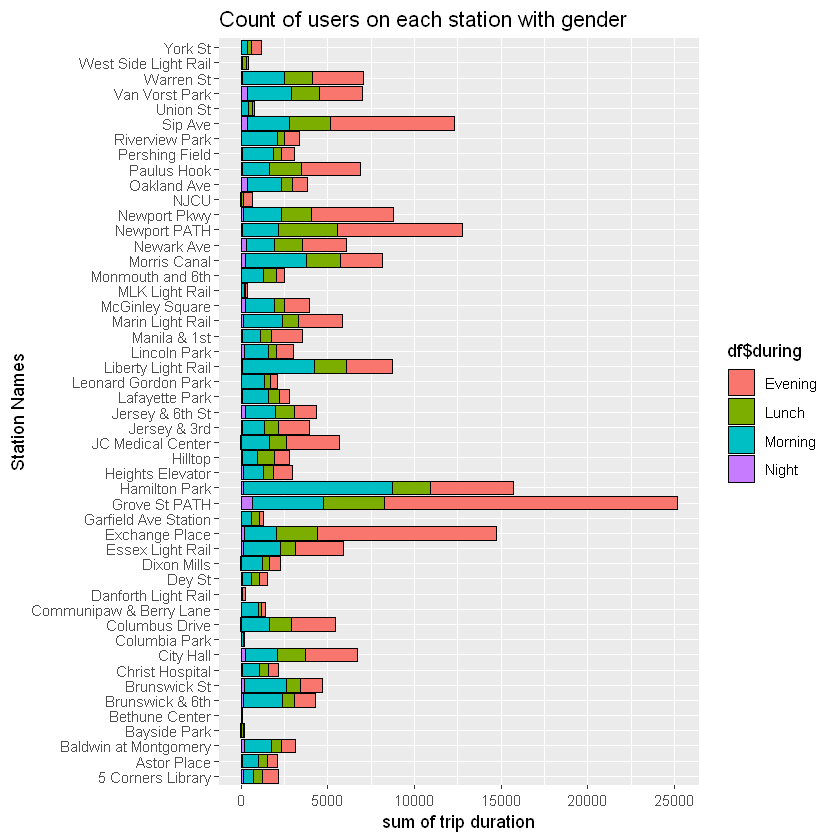

In [43]:
ggplot(data = df, aes(x = df$start.station.name, y = df$trip, fill = df$during)) + 
    geom_histogram(stat= "identity", color="Black") + 
    coord_flip()+
    ggtitle("Count of users on each station with gender")+
    ylab("sum of trip duration")+
    xlab("Station Names")

### Drastic change in histogram when made against trip duration at each station:
- **More customers does not necessarilly mean more total trip duration from each station and therafter more revenue generated from Fare. As we can see changes in both the graphs above are quite big from Station Name vs no of user to Sum of trip durations by the time of the day.**

### 3. Based on your anomalies analysis in (1) and geographical usage in (2), what recommendation would you provide to the CitiBike operators

**Solution:**

### Recommendations: 
1) **From the anomalies analysis we can see that we have some impossible trip durations(25 days of bike riding) which could be machine error or stolen bike and should be looked into and resolved.**

2) **We can also see trip durations between 2 stations which is impossible to cover in that time with how far the stations are. These data discrepancy should be resolved for better business insights.**

3) **Station resources should be re allocated according to the traffic on those stations. Stations with high traffic should have more bikes and stations with low traffic throughout the day should have less bikes. This not only lowers the operation cost but also resolves two extreme situation where a station is either out of bikes to offer user or a station which has bikes sitting and not being used.**

4) **Resources should be also allocated considering what time of the day the station has highest traffic and when is it not busy.**

5) **From the graphs we can see that most of our users are gender 1 and we should tailor discounts for other genders to lure them on using the bikes assuming the population has equally distributed genders.**

## Problem 2: Aviation Accidents
>*Aviation accidents involve human injuries, fatalities, and aircraft damages in multiple levels.
Link to dataset:
https://github.com/jcbonilla/BusinessAnalytics/blob/master/BAData/aviation.csv*
### Questions:
Using the aviation data provide, develop an analysis that does the following:
1. A visualization of fatal vs. non-fatal crashes in the US from the 1940s through 2013.
2. An additional displays for:
 - a. Countries with most incidents
 - b. Historical deaths by year

### 1. A visualization of fatal vs. non-fatal crashes in the US from the 1940s through 2013.
**Solution:**

In [44]:
#data importing 
Main.df = read.csv("C:\\Users\\shrey\\OneDrive\\Desktop\\BUSINESS ANALYTICS\\Datasets\\Data 3.2.csv")

In [45]:
#Data Understanding and Exploration
head(Main.df,2)
str(Main.df)

ï..Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Air.Carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.Phase.of.Flight,Report.Status,Publication.Date,X
20130607X70213,Accident,CEN13FA326,06/07/2013,"Baker, LA",United States,30.57639,-91.13694,,,...,,1,NA,NA,NA,VMC,,Preliminary,06/14/2013,NA
20130607X04715,Accident,ERA13FA273,06/06/2013,"Manchester, KY",United States,37.13278,-83.75639,,,...,,3,NA,NA,NA,VMC,,Preliminary,06/12/2013,NA


'data.frame':	5536 obs. of  32 variables:
 $ ï..Event.Id           : Factor w/ 5467 levels "20001204X00006 ",..: 5467 5466 5465 5465 5464 5461 5460 5458 5459 5462 ...
 $ Investigation.Type    : Factor w/ 2 levels " Accident "," Incident ": 1 1 1 1 1 1 1 1 1 1 ...
 $ Accident.Number       : Factor w/ 5536 levels " ANC00FA018 ",..: 620 2331 5533 5532 637 5531 2330 2329 619 636 ...
 $ Event.Date            : Factor w/ 3303 levels " 01/01/1997 ",..: 1351 1341 1285 1285 1260 1250 1239 1213 1213 1202 ...
 $ Location              : Factor w/ 4493 levels "  "," , Gabon ",..: 250 2378 123 123 1438 2695 2337 1925 983 233 ...
 $ Country               : Factor w/ 120 levels "  "," Afghanistan ",..: 116 116 116 116 40 116 116 116 116 96 ...
 $ Latitude              : num  30.6 37.1 33.9 33.9 NA ...
 $ Longitude             : num  -91.1 -83.8 -112.2 -112.2 NA ...
 $ Airport.Code          : Factor w/ 1652 levels " --- ","  "," 00R ",..: 2 2 888 888 2 656 2 2 2 2 ...
 $ Airport.Name          : Factor 

In [46]:
#converting Event.Date from factor to date data type
Main.df$Event.Date = as.POSIXct(Main.df$Event.Date,format="%m/%d/%Y",tz=Sys.timezone())

In [47]:
#Splitting data with 1940 through 2013
df_2013_1940 = Main.df[Main.df$Event.Date>= "1940-01-01" & Main.df$Event.Date <= "2013-12-01",]

Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

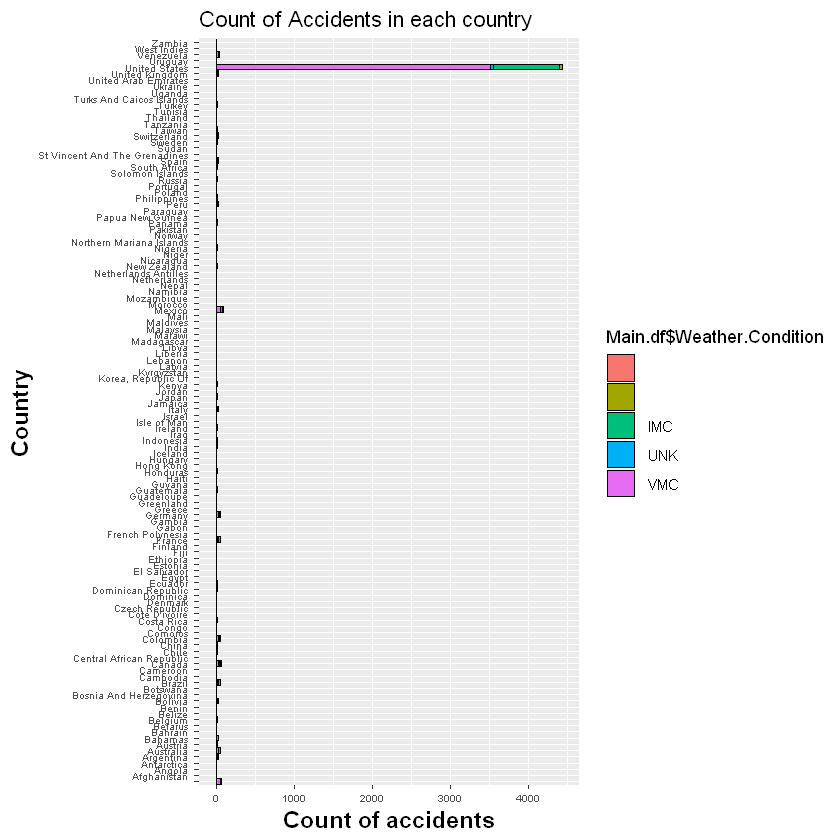

In [49]:
ggplot(data = df_2013_1940, aes(x = df_2013_1940$Country, fill = Main.df$Weather.Condition)) + 
    geom_histogram(stat = "count",, color="Black") + 
    coord_flip()+
    ggtitle("Count of Accidents in each country")+
    ylab("Count of accidents")+
    xlab("Country")+
    theme(axis.text=element_text(size=6),
        axis.title=element_text(size=14,face="bold"))
    

- ### From the above graph we can see how USA has accidents way more than any other country.

## Lets just explore Accidents in USA between 1940 to 2013:

In [50]:
df_USA = df_2013_1940[df_2013_1940$Country == " United States ",]

Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

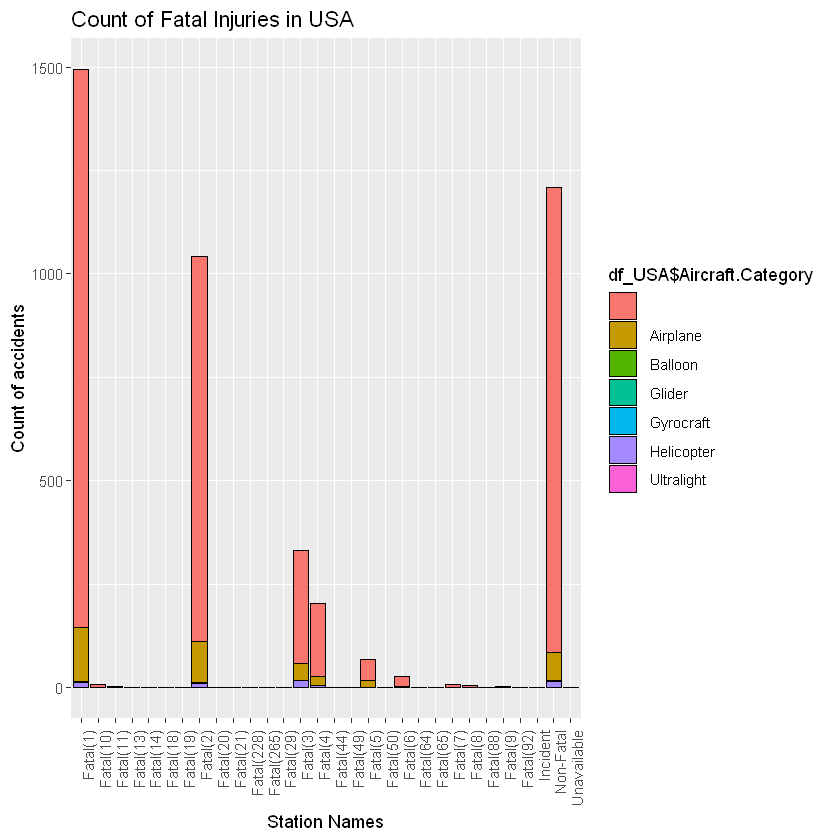

In [52]:
df_USA$Total.Fatal.Injuries = as.factor(df_USA$Total.Fatal.Injuries)

ggplot(data = df_USA, aes(x = df_USA$Injury.Severity,fill = df_USA$Aircraft.Category),color ="red") + 
    geom_histogram(stat = "count",binwidth = 10, color="Black") + 
    ggtitle("Count of Fatal Injuries in USA")+
    ylab("Count of accidents")+
    xlab("Station Names")+
    theme(axis.text.x = element_text(angle = 90, hjust = 1))

- **The above graph shows the Highest fatal death is 1 to 2 in any accident between 1940 to 2013 in USA. Also, if we dont consider the empty data spots, we can see Airplane accident are the highest compared to other modes.**
- **We can see count of Non-Fatal is higher than Fatal 2 deaths but lower than Fatal 1 death.**

Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

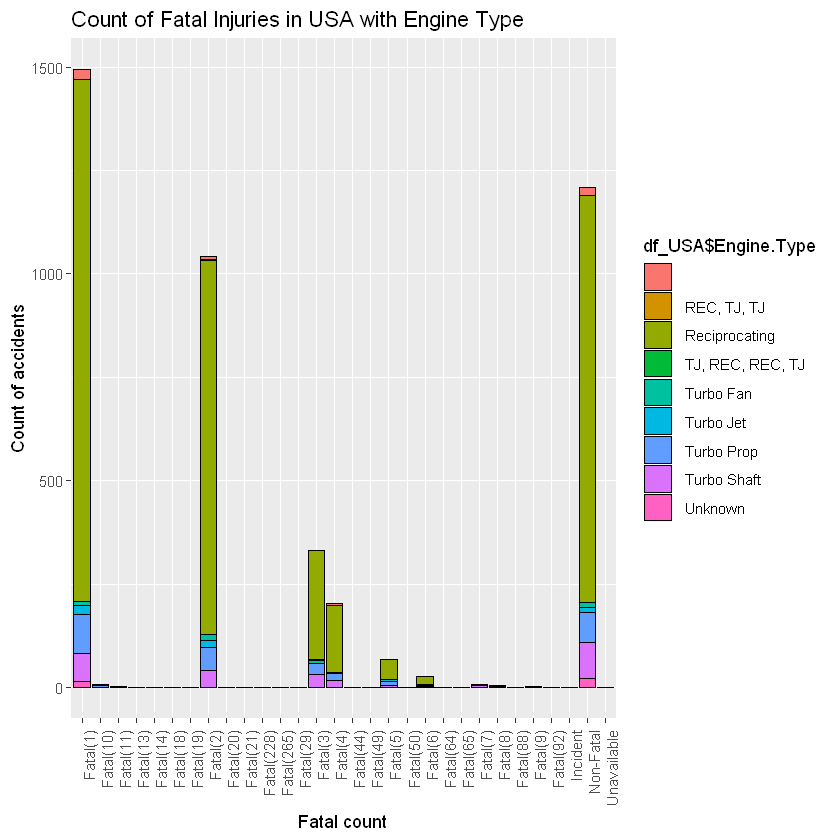

In [53]:

ggplot(data = df_USA, aes(x = df_USA$Injury.Severity,fill = df_USA$Engine.Type),color ="red") + 
    geom_histogram(stat = "count",binwidth = 10,, color="Black") + 
    ggtitle("Count of Fatal Injuries in USA with Engine Type")+
    ylab("Count of accidents")+
    xlab("Fatal count")+
    theme(axis.text.x = element_text(angle = 90, hjust = 1))

### Graph shows most of the Accident plans had Resiprocating. Maybe its a coinsidence and there is an external factor too but we dont know yet.

Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

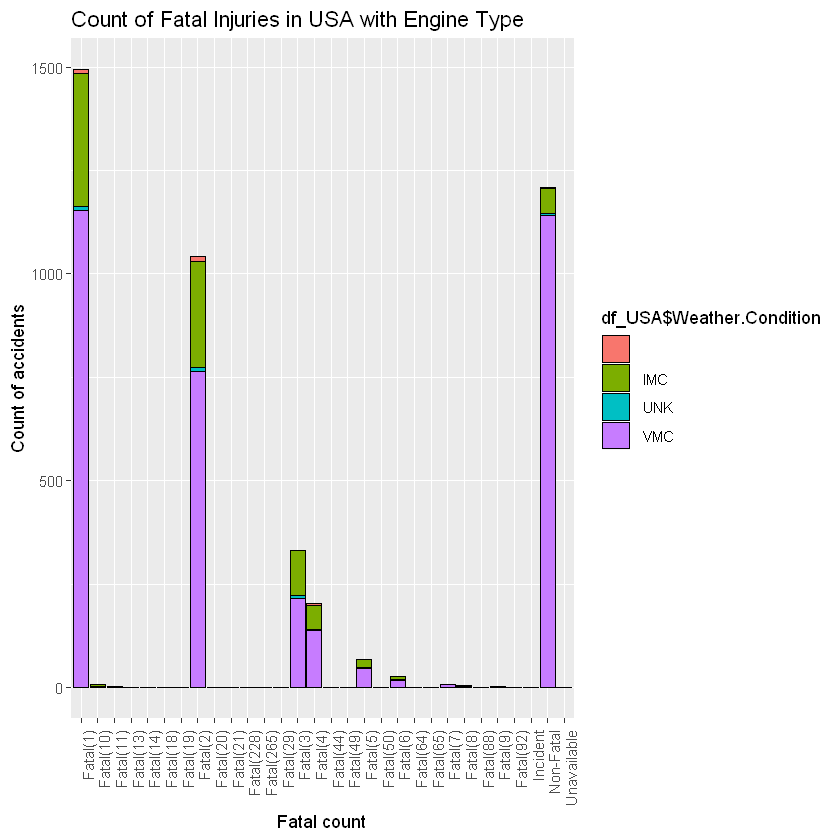

In [54]:

ggplot(data = df_USA, aes(x = df_USA$Injury.Severity,fill = df_USA$Weather.Condition),color ="red") + 
    geom_histogram(stat = "count",binwidth = 10, color="Black") + 
    ggtitle("Count of Fatal Injuries in USA with Engine Type")+
    ylab("Count of accidents")+
    xlab("Fatal count")+
    theme(axis.text.x = element_text(angle = 90, hjust = 1))

### Major flight accidents took place in VMC (visual meteorological conditions ) weather. We dont know if corelation is causation, but this could be something they can look further into.

Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

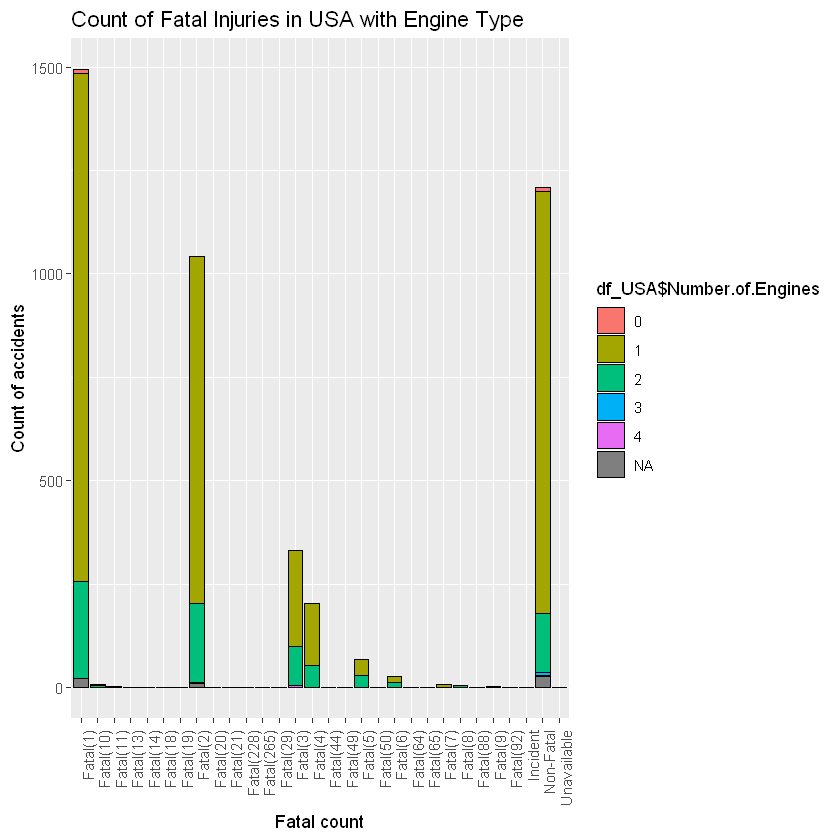

In [55]:
df_USA$Number.of.Engines = as.factor(df_USA$Number.of.Engines)
ggplot(data = df_USA, aes(x = df_USA$Injury.Severity,fill = df_USA$Number.of.Engines),color ="red") + 
    geom_histogram(stat = "count",binwidth = 10,, color="Black") + 
    ggtitle("Count of Fatal Injuries in USA with Engine Type")+
    ylab("Count of accidents")+
    xlab("Fatal count")+
    theme(axis.text.x = element_text(angle = 90, hjust = 1))

### Major plans who met with accidents are 1 engine planes.

Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

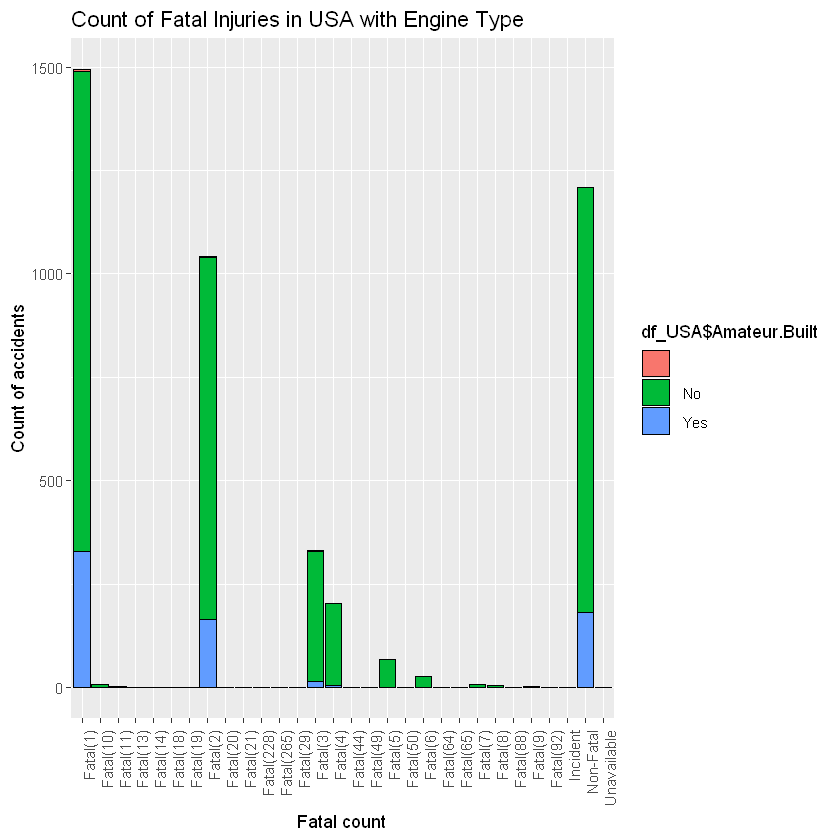

In [56]:

 ggplot(data = df_USA, aes(x = df_USA$Injury.Severity,fill = df_USA$Amateur.Built),color ="red") + 
    geom_histogram(stat = "count", color="black") + 
    ggtitle("Count of Fatal Injuries in USA with Engine Type")+
    ylab("Count of accidents")+
    xlab("Fatal count")+
    theme(axis.text.x = element_text(angle = 90, hjust = 1))


### This is strange that Most of the accident planes were not with Amature Built which if you reason should be other way around. 




## Lets just talk about fatal and non fatal irrespective of numbers since question asks that:


In [70]:
for ( a in 1:nrow(df_USA)){
    if(df_USA$Injury.Severity[a]==" Non-Fatal "){
        df_USA$fatal.or.not[a] = "Non-Fatal"
    }
    else{
        df_USA$fatal.or.not[a] = "Fatal"
    }
}

Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

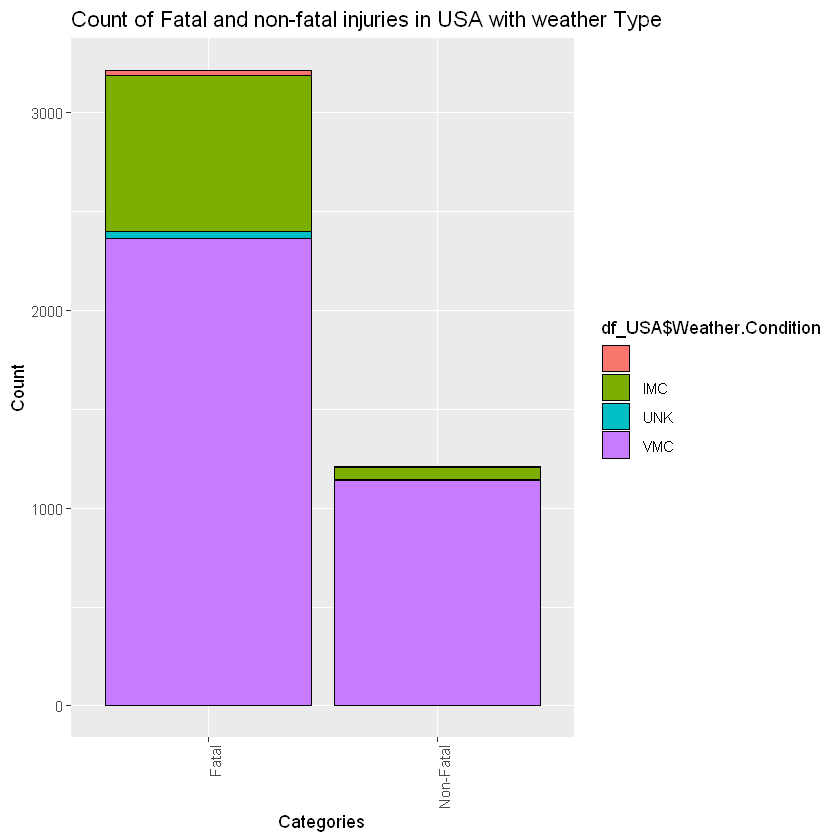

In [76]:

ggplot(data = df_USA, aes(x = df_USA$fatal.or.not, fill = df_USA$Weather.Condition)) + 
    geom_histogram(stat = "count", color="black") + 
    ggtitle("Count of Fatal and non-fatal injuries in USA with weather Type")+
    ylab("Count")+
    xlab("Categories")+
    theme(axis.text.x = element_text(angle = 90, hjust = 1))

## The above plots shows:
- **The count of fatal accidents are more than twice Non-Fatal**
- **Majority of the accidents were in VMC weather conditions**

### 2. An additional displays for:
- a. Countries with most incidents
- b. Historical deaths by year

**Solution a:**

In [77]:
#Grouping countries 
df_grouped = Main.df %>% group_by(Country) %>% 
summarise(Accident.no = n(),Total.Fatal = sum(Total.Fatal.Injuries,na.rm = T)) 

In [78]:
#Sorting them by the sum of Total fatal Injuries
df_grouped_asc = df_grouped[order(df_grouped$Accident.no,df_grouped$Total.Fatal),]

In [79]:
#subsetting 20 top Countries with highest Fatal Injuries
top_20 = tail(df_grouped_asc,20)

Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

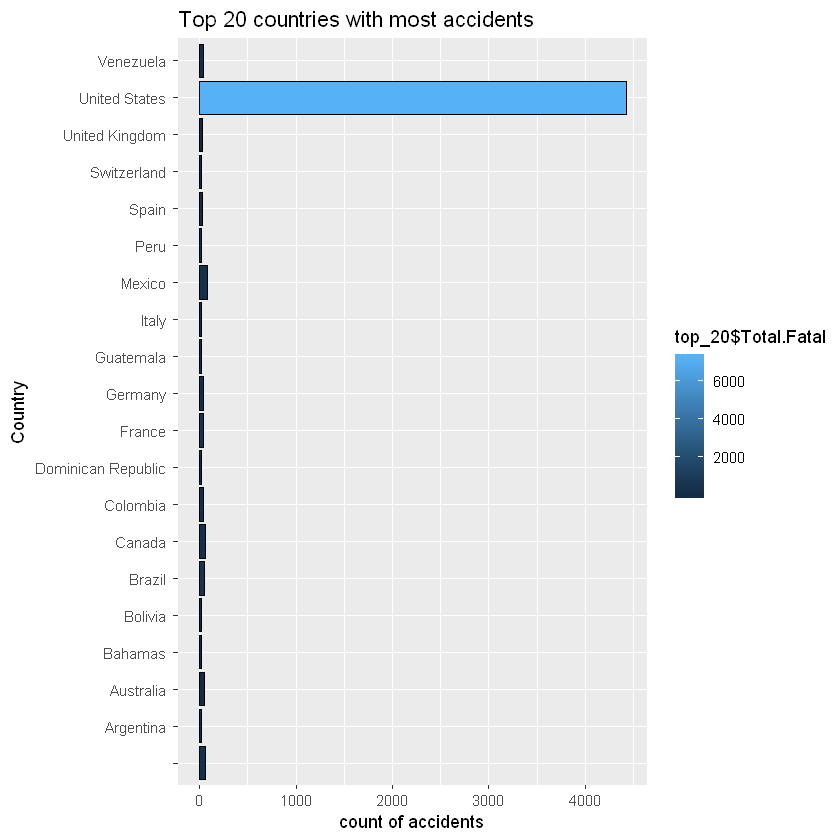

In [80]:
ggplot(data =  top_20, aes(x= top_20$Country, y = top_20$Accident.no, fill = top_20$Total.Fatal))+
    geom_histogram(stat = "identity",color="black")+
    coord_flip()+
    xlab("Country")+
    ylab("count of accidents")+
    ggtitle("Top 20 countries with most accidents")

Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

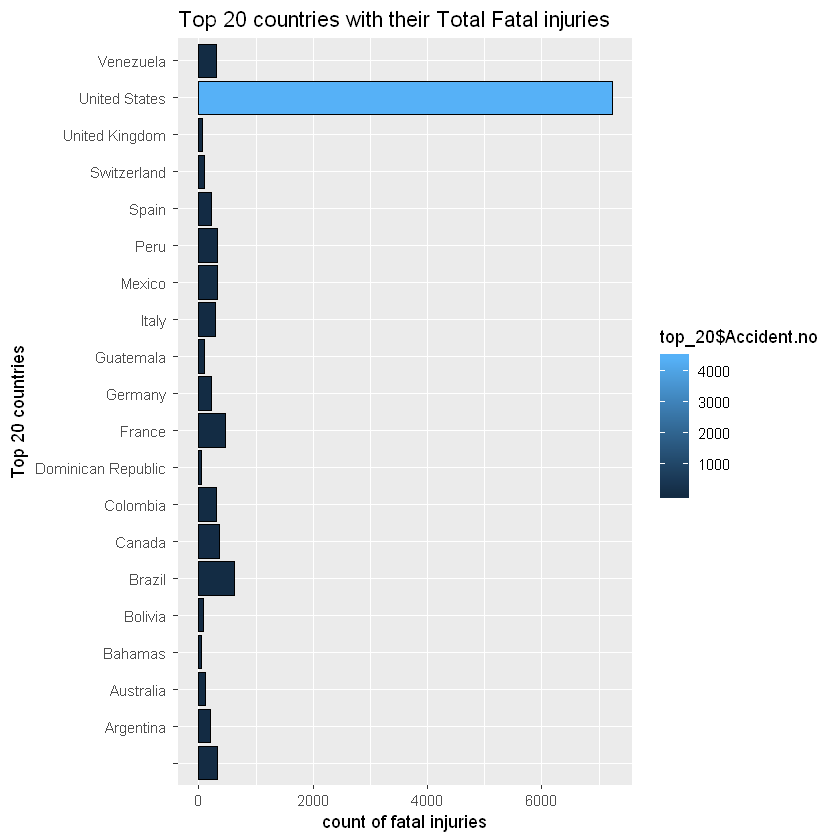

In [81]:
ggplot(data =  top_20, aes(x= top_20$Country, y = top_20$Total.Fatal, fill = top_20$Accident.no))+
    geom_histogram(stat = "identity", color="Black")+
    coord_flip()+
    xlab("Top 20 countries")+
    ylab("count of fatal injuries")+
    ggtitle("Top 20 countries with their Total Fatal injuries")

- ### The above graphs show 20 countries with the most accidents and USA is topping the list with a huge margin. Not only in the count of accidents but also with the number of fatal injuries

### b. Historical deaths by year

**Solution b:**

Warning message:
"Removed 730 rows containing missing values (geom_point)."

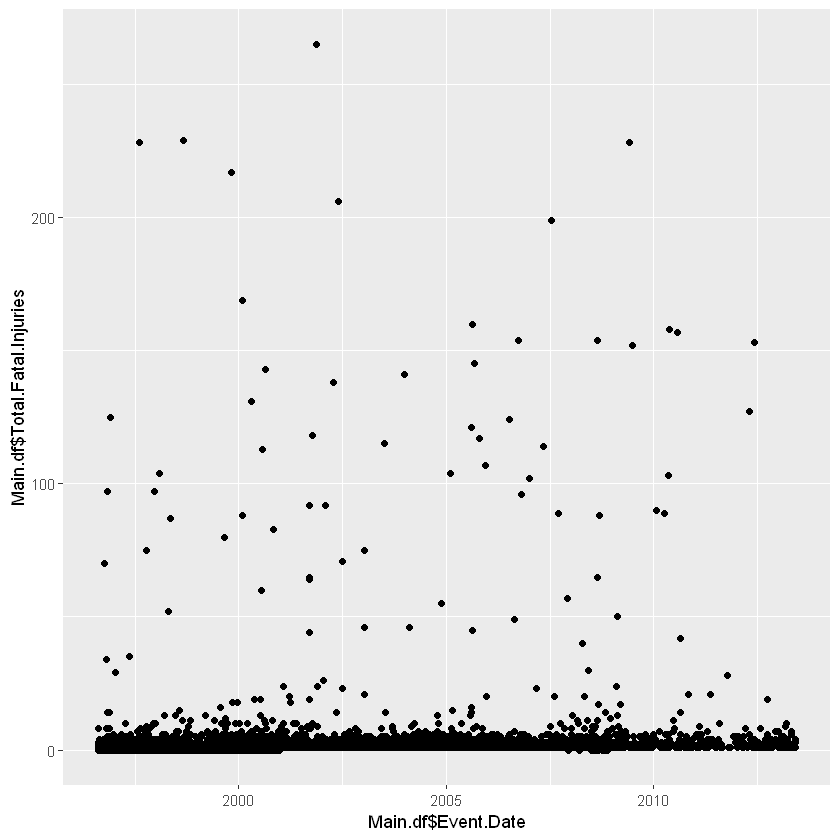

In [82]:
ggplot(data = Main.df , aes(x = Main.df$Event.Date, y= Main.df$Total.Fatal.Injuries))+
    geom_point()

### The above visual doesnt really show a lot of information since the points are somewhat equally spreaded out.

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
Warning message:
"Removed 730 rows containing non-finite values (stat_smooth)."

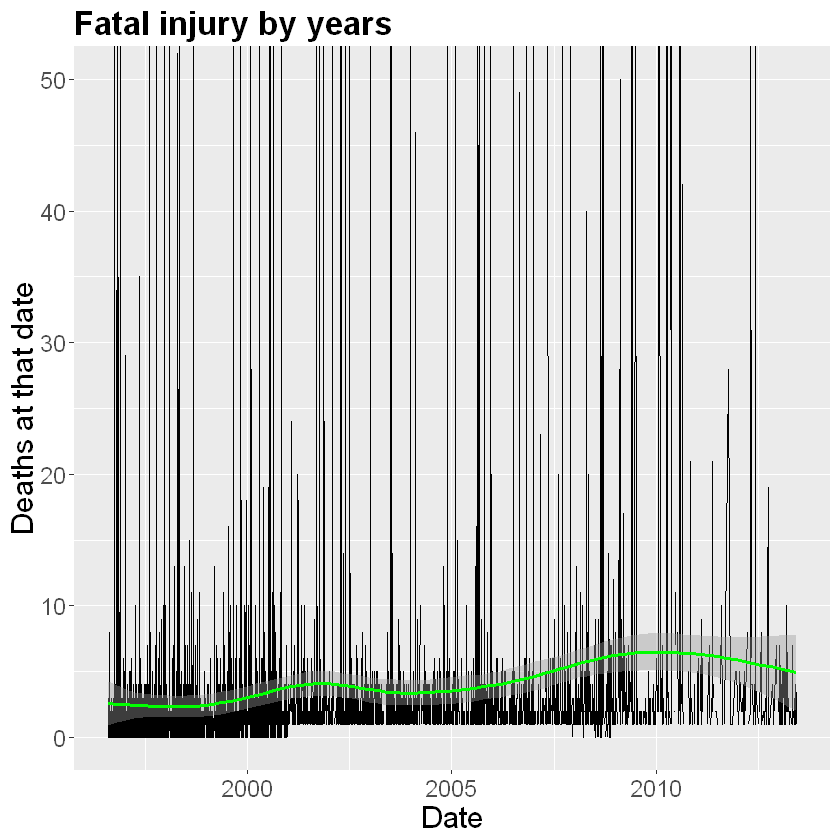

In [83]:
ggplot(Main.df, aes(x = Main.df$Event.Date, y= Main.df$Total.Fatal.Injuries)) +
           geom_line(na.rm=TRUE) +  
           ggtitle("Fatal injury by years") +
           xlab("Date") + ylab("Deaths at that date") +
           theme(plot.title = element_text(lineheight=.8, face="bold", size = 20)) +
           theme(text = element_text(size=18))+
            coord_cartesian(ylim=c(0,50)) + 
            stat_smooth(colour="green")


### I have further zoomed in to ignore the outliers and understand the trendline over number of fatal injuries over time. 
- **From the trendline it appears like the fatal injury count went up and down but relatively kept increasing over time.**
- **We can see a wave like pattern in the trendline**

## Problem 3: Retail Targets
>*Assume you are a Northeaster (NE) regional manager and have been asked to benchmark your
region against the performance of other regions in the USA. Analyze and visualize the 10-year
percent change in demographics.*

1) The NE Region includes the following states:
  - Maine(ME), New York(NY), New Jersey(NJ), Vermont(VT), Massachusetts(MA), Rhode Island(RI), Connecticut(CT), New Hampshire(NH), and Pennsylvania(PA)
  
2) For each 10-year percent change. Demographics include:
 - Population, Income, Density, Ownhome
 - Percentage of U18, college, white, black
Link to dataset:
https://github.com/jcbonilla/BusinessAnalytics/blob/master/BAData/HDLData.csv

### 1) The NE Region includes the following states:
  - Maine(ME), New York(NY), New Jersey(NJ), Vermont(VT), Massachusetts(MA), Rhode Island(RI), Connecticut(CT), New Hampshire(NH), and Pennsylvania(PA)
  
**Solution :**

In [84]:
Main.df = read.csv("C:\\Users\\shrey\\OneDrive\\Desktop\\BUSINESS ANALYTICS\\Datasets\\Data 3.3.csv")

In [85]:
#Data Understanding and Data Exploration:
colnames(Main.df)
head(Main.df,2)
str(Main.df)

[1] "areaname"        "county"          "state"           "r1"             
 [5] "r2"              "Lcount"          "HDcount"         "pop_2000"       
 [9] "pop_2010"        "income_2000"     "income_2010"     "pct_U18_2000"   
[13] "pct_U18_2010"    "pctcollege_2000" "pctcollege_2010" "ownhome_2000"   
[17] "ownhome_2010"    "density_2000"    "density_2010"    "pctwhite_2000"  
[21] "pctwhite_2010"   "pctblack_2000"   "pctblack_2010"

areaname,county,state,r1,r2,Lcount,HDcount,pop_2000,pop_2010,income_2000,...,pctcollege_2000,pctcollege_2010,ownhome_2000,ownhome_2010,density_2000,density_2010,pctwhite_2000,pctwhite_2010,pctblack_2000,pctblack_2010
Autauga,1001,AL,6,3,1,1,43671,54571,48458,...,18.0,21.8,80.8,75.4,73.3,91.8,80.7,78.5,22.1,17.7
Baldwin,1003,AL,6,3,2,2,140415,182265,47028,...,23.1,26.6,79.5,72.5,88.0,114.6,87.1,85.7,12.2,9.4


'data.frame':	3146 obs. of  23 variables:
 $ areaname       : Factor w/ 1837 levels "Abbeville","Acadia",..: 82 89 100 149 164 223 233 244 291 313 ...
 $ county         : int  1001 1003 1005 1007 1009 1011 1013 1015 1017 1019 ...
 $ state          : Factor w/ 51 levels "AK","AL","AR",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ r1             : int  6 6 6 6 6 6 6 6 6 6 ...
 $ r2             : int  3 3 3 3 3 3 3 3 3 3 ...
 $ Lcount         : int  1 2 0 0 0 0 0 2 0 0 ...
 $ HDcount        : int  1 2 0 0 0 0 0 1 0 0 ...
 $ pop_2000       : num  43671 140415 29038 20826 51024 ...
 $ pop_2010       : num  54571 182265 27457 22915 57322 ...
 $ income_2000    : int  48458 47028 31877 37230 41573 23990 30915 39908 36598 36920 ...
 $ income_2010    : int  63458 57447 40109 51951 53807 33763 39808 48971 40753 47489 ...
 $ pct_U18_2000   : num  28.6 24.4 25.4 25.4 25.4 26.1 26.9 23.6 24.6 22.2 ...
 $ pct_U18_2010   : num  26.8 23 21.9 22.7 24.6 22.3 24.1 22.9 22.5 21.4 ...
 $ pctcollege_2000: num  18 23.1 10.9

## Before we start we need to calculate percentage change for given data over 10 years to better understand the growth:
- We will create more columns from calulation of other columns and later drop the ones we dont rrequire for simplification.

### Percentage change formula:
$(V2−V1)/V1×100$

### Percentage change of Percentages:
$|V1−V2|/((V1+V2)/2)×100$

In [86]:
# Percent change of value
Main.df$Pchange.pop = ((Main.df$pop_2010-Main.df$pop_2000)/Main.df$pop_2000)*100
Main.df$Pchange.Income = ((Main.df$income_2010-Main.df$income_2000)/Main.df$income_2000)*100


Main.df$Pchange.ownhome  = ((Main.df$ownhome_2010 - Main.df$ownhome_2000) / Main.df$ownhome_2000) *100
Main.df$Pchange.density  = ((Main.df$density_2010 - Main.df$density_2000) / Main.df$density_2000) *100

# Percent change of Percentages
Main.df$Pchange.U18  = ((Main.df$pct_U18_2010 - Main.df$pct_U18_2000) / 
                        ((Main.df$pct_U18_2000+Main.df$pct_U18_2010)/2)) *100

Main.df$Pchange.college  = ((Main.df$pctcollege_2010 - Main.df$pctcollege_2000) / 
                            ((Main.df$pctcollege_2000+Main.df$pctcollege_2010)/2)) *100

Main.df$Pchange.white  = ((Main.df$pctwhite_2010 - Main.df$pctwhite_2000) / 
                          ((Main.df$pctwhite_2000+Main.df$pctwhite_2010)/2)) *100

Main.df$Pchange.black  = ((Main.df$pctblack_2010 - Main.df$pctblack_2000) / 
                          ((Main.df$pctblack_2000+Main.df$pctblack_2010)/2)) *100

In [87]:
head(Main.df)

areaname,county,state,r1,r2,Lcount,HDcount,pop_2000,pop_2010,income_2000,...,pctblack_2000,pctblack_2010,Pchange.pop,Pchange.Income,Pchange.ownhome,Pchange.density,Pchange.U18,Pchange.college,Pchange.white,Pchange.black
Autauga,1001,AL,6,3,1,1,43671,54571,48458,...,22.1,17.7,24.959355,30.95464,-6.683168,25.238745,-6.498195,19.09548,-2.763819,-22.110553
Baldwin,1003,AL,6,3,2,2,140415,182265,47028,...,12.2,9.4,29.804508,22.15489,-8.805031,30.227273,-5.907173,14.08451,-1.620370,-25.925926
Barbour,1005,AL,6,3,0,0,29038,27457,31877,...,44.3,46.9,-5.444590,25.82426,-8.618331,-5.487805,-14.799154,12.87554,-6.646526,5.701754
Bibb,1007,AL,6,3,0,0,20826,22915,37230,...,24.2,22.0,10.030731,39.54069,-5.735661,10.179641,-11.226611,43.95604,-1.180328,-9.523810
Blount,1009,AL,6,3,0,0,51024,57322,41573,...,1.5,1.3,12.343211,29.42775,-3.357314,12.531646,-3.200000,24.65753,-2.663825,-14.285714
Bullock,1011,AL,6,3,0,0,11714,10914,23990,...,65.4,70.2,-6.829435,40.73781,-7.651007,-6.417112,-15.702479,15.56886,-9.523810,7.079646


In [88]:
#Let us split the states into regions
df_NorthEast = Main.df[Main.df$state == "NY" | Main.df$state == "NJ" | Main.df$state == "VT"
                | Main.df$state == "ME"| Main.df$state == "MA"| Main.df$state == "RI"
                | Main.df$state == "CT"| Main.df$state == "NH"
                | Main.df$state == "PA",]

df_NorthEast$Region = "NE"

df_MiddleWest = Main.df[Main.df$state == "ND" | Main.df$state == "MN" | Main.df$state == "WI"
                | Main.df$state == "MI"| Main.df$state == "SD"| Main.df$state == "IA"
                | Main.df$state == "IL"| Main.df$state == "IN"
                | Main.df$state == "OH"| Main.df$state == "NE"| Main.df$state == "KS"
                | Main.df$state == "MO",]

df_MiddleWest$Region = "MW"

df_South = Main.df[Main.df$state == "OK" | Main.df$state == "AR" | Main.df$state == "TN"
                | Main.df$state == "KY"| Main.df$state == "WV"| Main.df$state == "VA"
                | Main.df$state == "TX"| Main.df$state == "LA"| Main.df$state == "MS"
                | Main.df$state == "AL"| Main.df$state == "GA"| Main.df$state == "SC"
                | Main.df$state == "NC"| Main.df$state == "FL",]

df_South$Region = "S"

df_West = Main.df[Main.df$state == "WA" | Main.df$state == "MT" | Main.df$state == "OR"
                | Main.df$state == "ID"| Main.df$state == "WY"| Main.df$state == "CA"
                | Main.df$state == "NV"| Main.df$state == "UT"| Main.df$state == "CO"
                | Main.df$state == "AZ"| Main.df$state == "NM"| Main.df$state == "AK"
                | Main.df$state == "HI",]

df_West$Region = "W"


region_df = rbind(df_MiddleWest,df_South,df_West,df_NorthEast)

In [89]:
summary(region_df$Region)

   Length     Class      Mode 
     3118 character character 

> When grouping by and summerizing the percentages we have to assume that the percenatges were out of same number with all the states since the value wasnt provided. This is not how it is in reality.

In [90]:
#Grouping by Region and adding up simple numbers and taking mean of percentages of data points
groupby_Region = region_df %>% group_by(Region) %>% 
summarise(No.States = n(),Total.population2000 = sum(pop_2000,na.rm = T), 
          Total.population2010 = sum(pop_2010,na.rm =T),Total.income2000 = sum(income_2000,na.rm = T), 
          Total.Income2010 = sum(income_2010,na.rm =T), cum.Pchange.U18 = mean(Pchange.U18,na.rm = T),
          cum.Pchange.college = mean(Pchange.college,na.rm = T),
          cum.Pchange.white = mean(Pchange.white,na.rm = T),
          cum.Pchange.black = mean(Pchange.black,na.rm = T),
          Total.ownhome2000 = sum(ownhome_2000,na.rm =T),Total.ownhome2010 = sum(ownhome_2010,na.rm = T), 
          Total.density_2010 = sum(density_2010,na.rm =T), Total.density.2000 = mean(density_2000,na.rm = T))  

In [91]:
groupby_Region

Region,No.States,Total.population2000,Total.population2010,Total.income2000,Total.Income2010,cum.Pchange.U18,cum.Pchange.college,cum.Pchange.white,cum.Pchange.black,Total.ownhome2000,Total.ownhome2010,Total.density_2010,Total.density.2000
MW,1055,64465246,67013419,46119837,57803553,-8.710434,13.35135,-1.954692,0.6159305,79580.4,78522.2,131840.7,120.0798
NE,217,53511303,55225516,10871832,13997335,-11.503040,14.18560,-2.758406,-2.6882390,15404.2,15294.7,302517.8,1348.0940
S,1397,93514195,107152321,54307280,68077153,-7.313496,12.06205,-2.098951,-6.5635608,104124.3,100546.1,282470.5,183.5324
W,449,63012612,71807536,19501831,25485598,-12.837099,11.04267,-1.612664,-9.1961030,31121.6,30700.0,67271.5,133.2969


In [92]:
#Lets calculate cumulative percentage changes of summed up population, Income, density and ownhouse
groupby_Region$cum.Pchange.pop = ((groupby_Region$Total.population2010-groupby_Region$Total.population2000)/groupby_Region$Total.population2000)*100
groupby_Region$cum.Pchange.Income = ((groupby_Region$Total.Income2010-groupby_Region$Total.income2000)/groupby_Region$Total.income2000)*100

groupby_Region$cum.Pchange.Density = ((groupby_Region$Total.density_2010-groupby_Region$Total.density.2000)/groupby_Region$Total.density.2000)*100
groupby_Region$cum.Pchange.Ownhome = ((groupby_Region$Total.ownhome2010-groupby_Region$Total.ownhome2000)/groupby_Region$Total.ownhome2000)*100

> In the above we calculated % change after adding up the values within grouped Region because they were simple values, and we couldnt do the same with the percentages

**Since above parameters werent in percentage already we calculated their percentage change after summerizing in the group.**

In [93]:
#drop unwanted columns that we have alread calculated
groupby_Region$Total.population2000 = NULL
groupby_Region$Total.population2010 = NULL
groupby_Region$Total.income2000 = NULL
groupby_Region$Total.Income2010 = NULL
groupby_Region$Total.density.2000 = NULL
groupby_Region$Total.density_2010 = NULL
groupby_Region$Total.ownhome2000 = NULL
groupby_Region$Total.density_2010 = NULL

In [94]:
summary(groupby_Region)

    Region            No.States      cum.Pchange.U18   cum.Pchange.college
 Length:4           Min.   : 217.0   Min.   :-12.837   Min.   :11.04      
 Class :character   1st Qu.: 391.0   1st Qu.:-11.837   1st Qu.:11.81      
 Mode  :character   Median : 752.0   Median :-10.107   Median :12.71      
                    Mean   : 779.5   Mean   :-10.091   Mean   :12.66      
                    3rd Qu.:1140.5   3rd Qu.: -8.361   3rd Qu.:13.56      
                    Max.   :1397.0   Max.   : -7.313   Max.   :14.19      
 cum.Pchange.white cum.Pchange.black Total.ownhome2010 cum.Pchange.pop 
 Min.   :-2.758    Min.   :-9.1961   Min.   : 15295    Min.   : 3.203  
 1st Qu.:-2.264    1st Qu.:-7.2217   1st Qu.: 26849    1st Qu.: 3.765  
 Median :-2.027    Median :-4.6259   Median : 54611    Median : 8.955  
 Mean   :-2.106    Mean   :-4.4580   Mean   : 56266    Mean   : 8.924  
 3rd Qu.:-1.869    3rd Qu.:-1.8622   3rd Qu.: 84028    3rd Qu.:14.114  
 Max.   :-1.613    Max.   : 0.6159   Max.  

# **Information regarding the below graphs:**
> ## MW = Middle West Region
> ## NE = North East Region
> ## S = South Region
> ## W = West Region

In [95]:
g = ggplot(data = groupby_Region, aes(x= groupby_Region$Region, fill = groupby_Region$Region))

Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

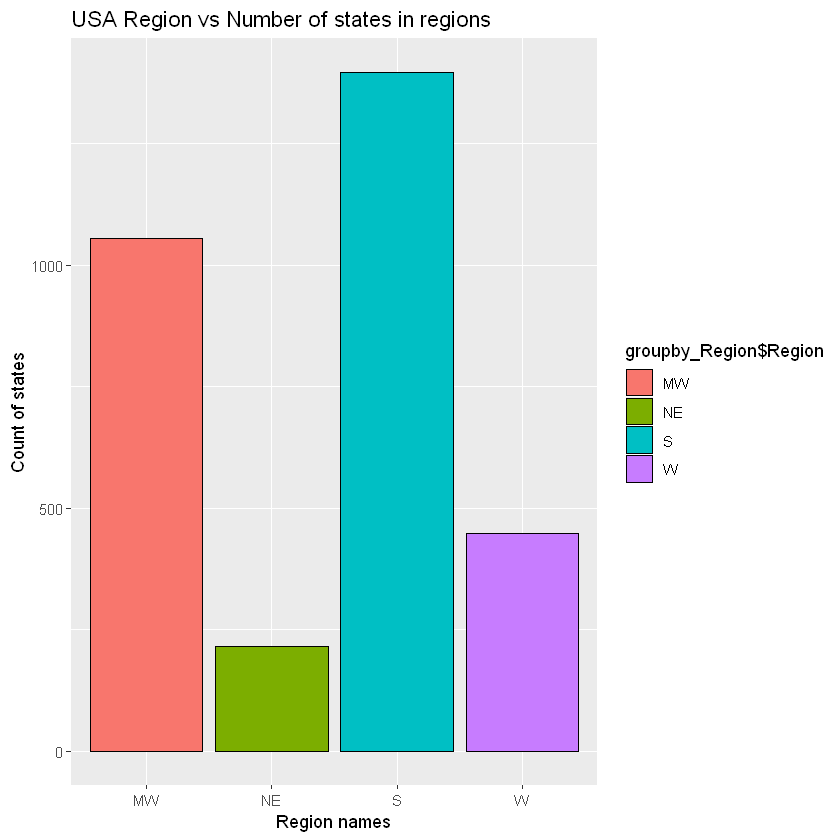

In [96]:
g + geom_histogram(aes(y = groupby_Region$No.States),stat = "Identity", color="Black")+
    ggtitle("USA Region vs Number of states in regions")+
    xlab("Region names")+
    ylab("Count of states")
    

#### North east region has the lowest number of states compared to all other Regions.

Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

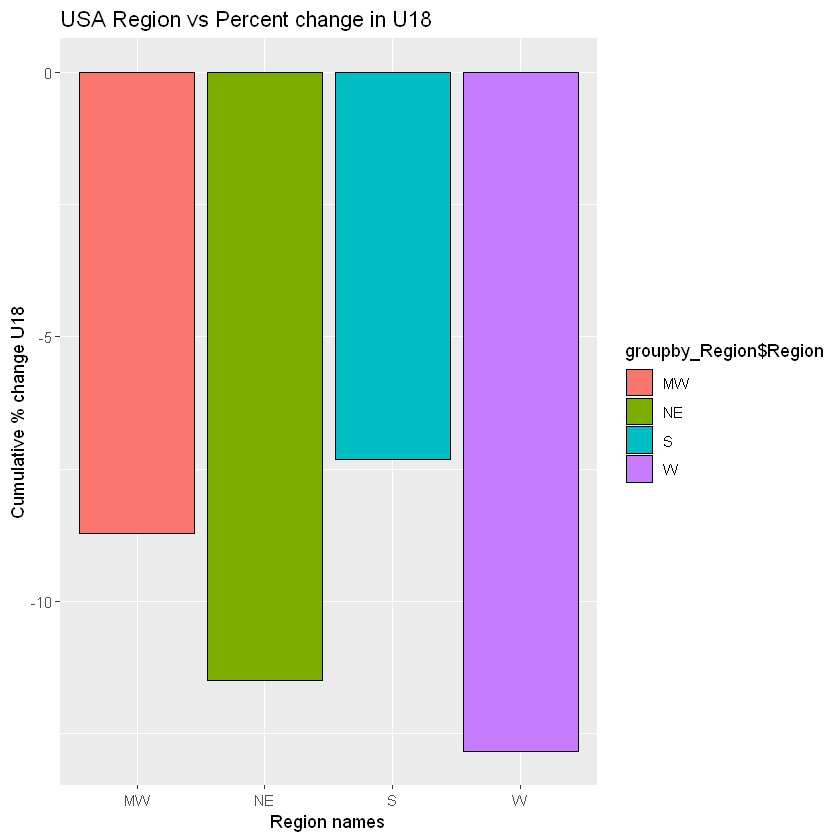

In [97]:
g+ geom_histogram(aes(y = groupby_Region$cum.Pchange.U18),stat = "Identity", color="Black")+
    ggtitle("USA Region vs Percent change in U18")+
    xlab("Region names")+
    ylab("Cumulative % change U18")

#### Above graph is for region vs Change in U18:
- **Clearly all the regions had decreased U18 in 10 years; where NE had the second highest decrease in U18**

Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

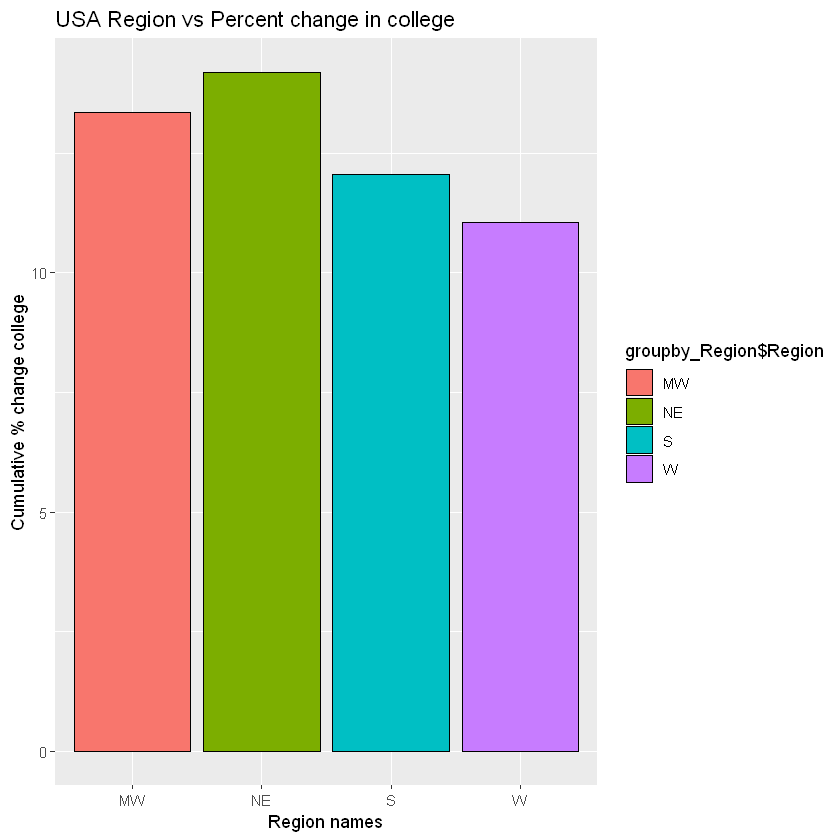

In [98]:
g+ geom_histogram(aes(y = groupby_Region$cum.Pchange.college),stat = "Identity", color="Black")+
    ggtitle("USA Region vs Percent change in college")+
    xlab("Region names")+
    ylab("Cumulative % change college")

#### Above is Region vs % change in College:
- **NE has the highest increase in College in 10 years, not by a big margin though**

Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

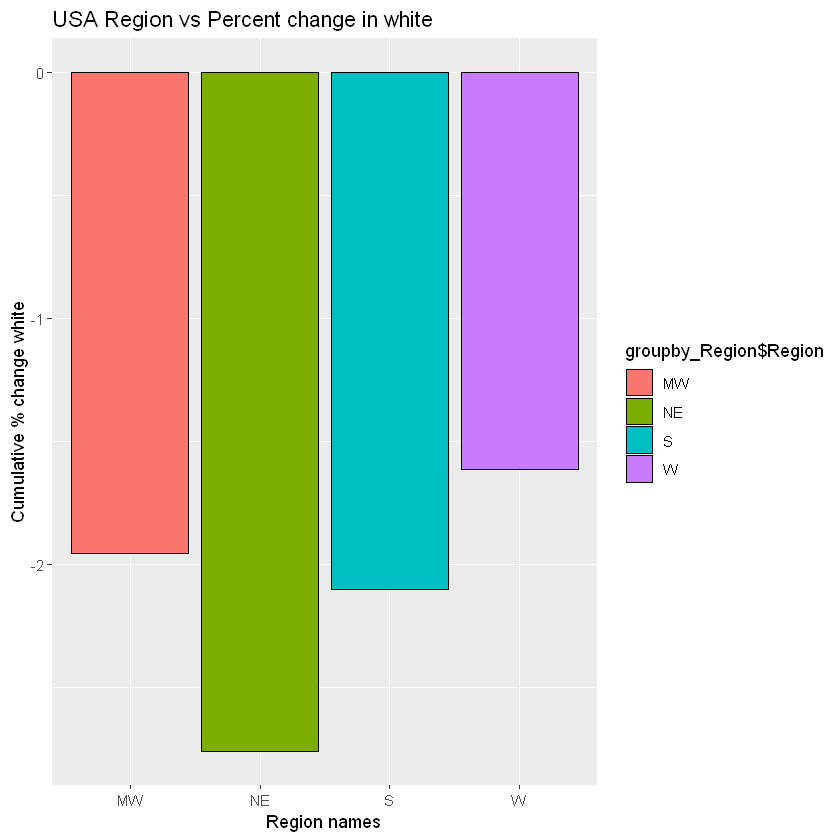

In [99]:
g+ geom_histogram(aes(y = groupby_Region$cum.Pchange.white),stat = "Identity", color="Black")+
    ggtitle("USA Region vs Percent change in white")+
    xlab("Region names")+
    ylab("Cumulative % change white")

#### Above is the % change in white population in 10 years:
- **all the region had drop in white population. Also, NE has the highest drop in white population over 10 years**

Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

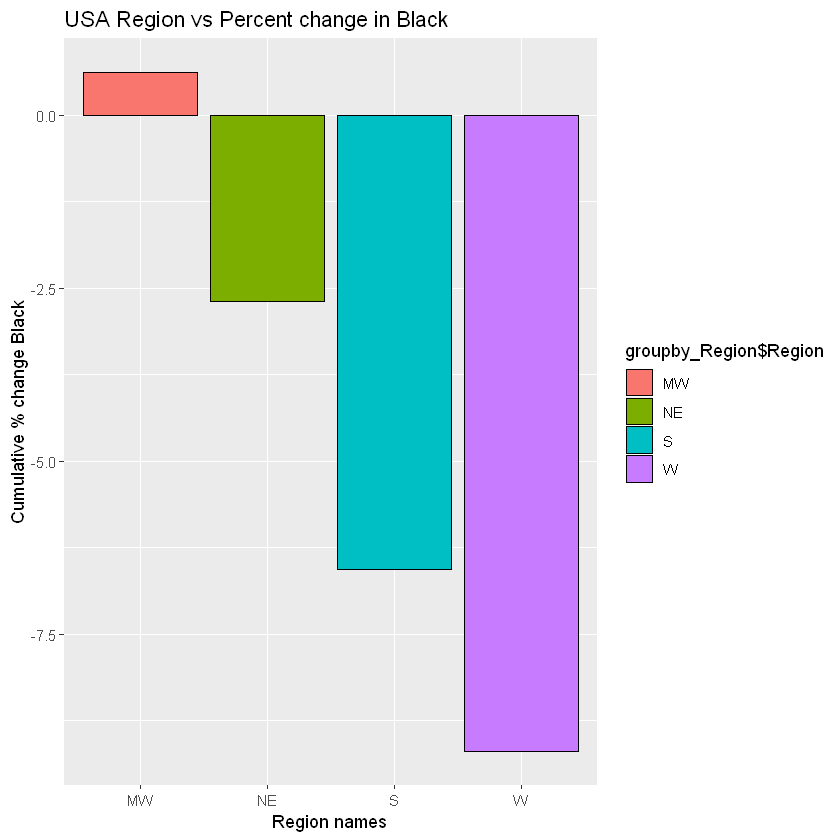

In [100]:
g+ geom_histogram(aes(y = groupby_Region$cum.Pchange.black),stat = "Identity", color="Black")+
    ggtitle("USA Region vs Percent change in Black")+
    xlab("Region names")+
    ylab("Cumulative % change Black")

#### Above graph is Region vs % Change in Black:
- **Only MW had increase in Black population other all regions had drop in Black population.**
- **NE has the third highest drop in Black population which is a little more than 2.5%**

Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

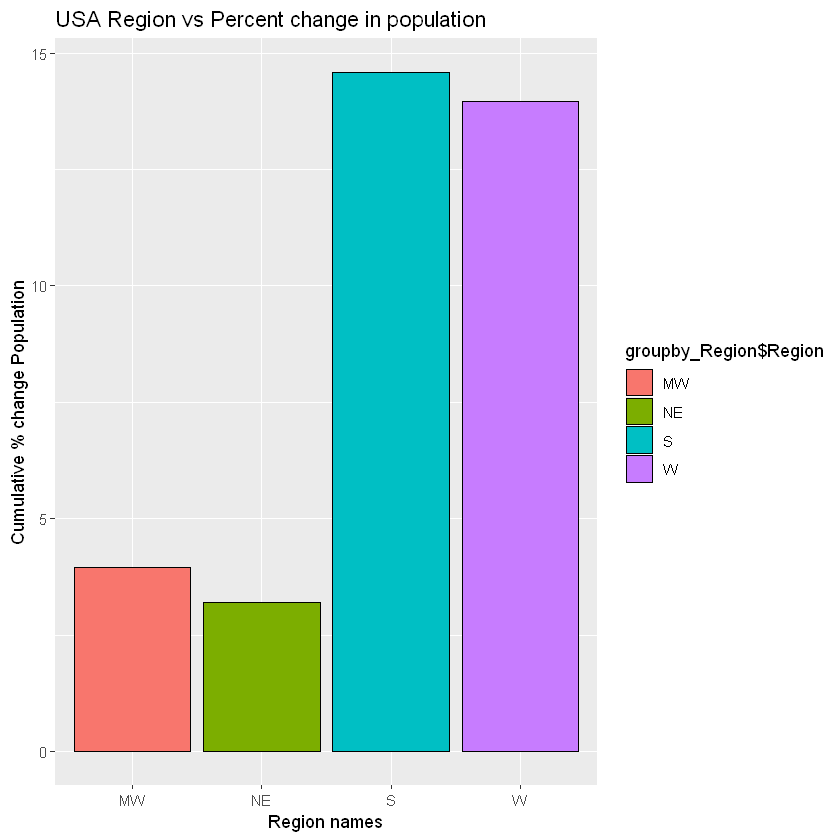

In [101]:
g+ geom_histogram(aes(y = groupby_Region$cum.Pchange.pop),stat = "Identity", color="Black")+
    ggtitle("USA Region vs Percent change in population")+
    xlab("Region names")+
    ylab("Cumulative % change Population")

#### Above is the graph between region and % change in population:
- **All the region had growth in population.**
- **NE had the lowest percentage growth of all the region over 10 years**

Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

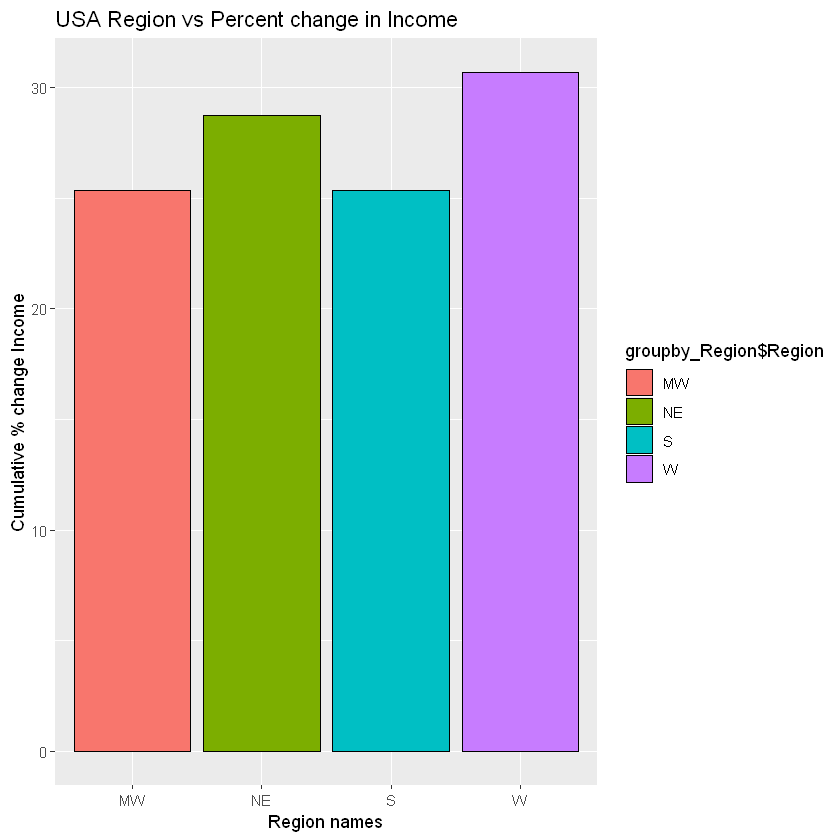

In [102]:
g+ geom_histogram(aes(y = groupby_Region$cum.Pchange.Income),stat = "Identity", color="Black")+
    ggtitle("USA Region vs Percent change in Income")+
    xlab("Region names")+
    ylab("Cumulative % change Income")

#### The above graph is between Region and %change in Income over 10 years:
- **All the region had positive Income growth.**
- **NE had the second highest income growth of all the regions.**

Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

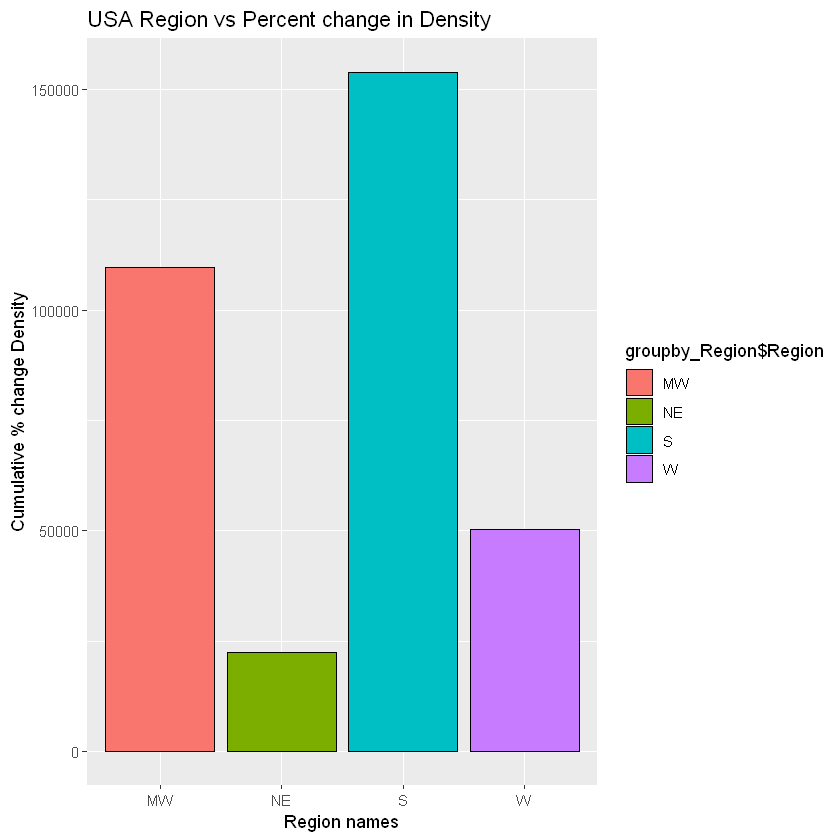

In [103]:
g+ geom_histogram(aes(y = groupby_Region$cum.Pchange.Density),stat = "Identity", color="Black")+
    ggtitle("USA Region vs Percent change in Density")+
    xlab("Region names")+
    ylab("Cumulative % change Density")

#### Above graph is between Region and % change in Density:
- **All the region had positive growth in density**
- **NE had the lowest positive growth in density over 10 years and top mostbeing S**

Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

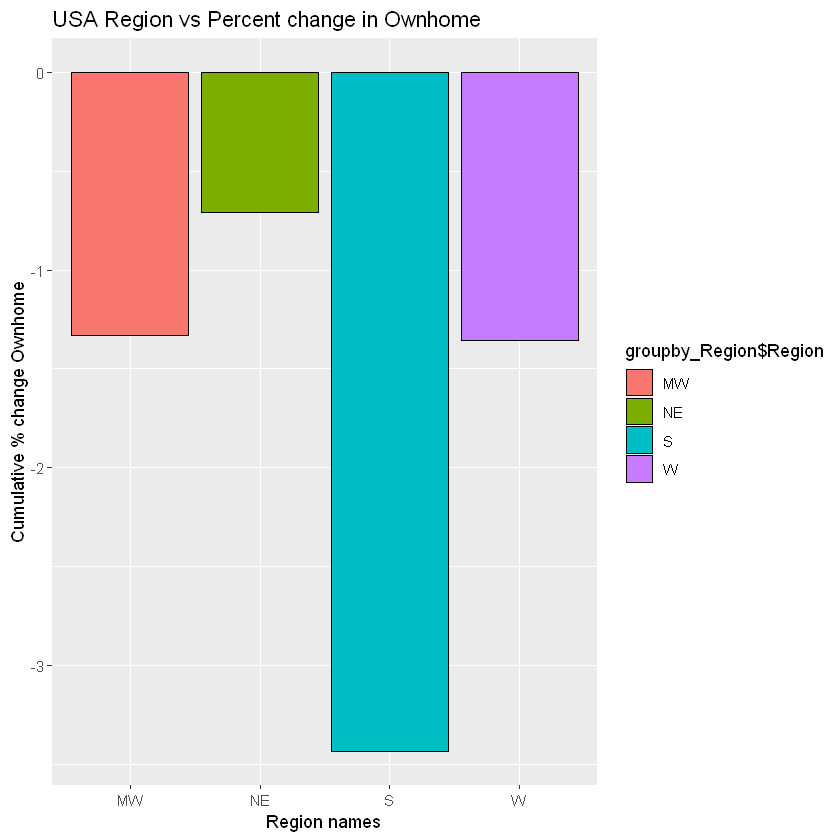

In [104]:
g+ geom_histogram(aes(y = groupby_Region$cum.Pchange.Ownhome),stat = "Identity", color="Black")+
    ggtitle("USA Region vs Percent change in Ownhome")+
    xlab("Region names")+
    ylab("Cumulative % change Ownhome")

#### Above graph is plotted between Region and %change in Ownhome:
- **All the regions had dropping Ownhome percentage**
- **NE had the least drop in Ownhome percentage compared to other regions**